https://jira.diamond.ac.uk/browse/MMG-150

The following functionality shall be available:

# 1. **Ability to define and run STXM scans using Python code.**
2. Ability to visualise the STXM scan results using a GUI.
# 3. **Ability to define and run ptychography scans using Python code.**
4. Ability to run ptychography reconstructions on a cluster, triggered by the completion of a scan.
5. Ability to visualise the completed ptychography reconstructions using a GUI.
# 6. **The MVP shall be available to use on P99.**
7. The MVP shall be demonstrated at a user workshop using P99 or an existing beamline.
Stretch Goal – Hardware driven


## Set up p99

In [1]:
from blueapi.client.client import BlueapiClient
from blueapi.client.event_bus import AnyEvent
from blueapi.config import ApplicationConfig, RestConfig, StompConfig,TcpUrl
from blueapi.worker.task import Task
from blueapi.service.model import TaskRequest
from bluesky_stomp.models import BasicAuthentication
from pydantic import HttpUrl
import h5py
import matplotlib.pyplot as plt
from time import time


In [2]:
p99Config =ApplicationConfig(
        stomp=StompConfig(
            enabled = True,
            url=TcpUrl("tcp://172.23.177.208:61613"),
            auth=BasicAuthentication(username="p99", password=password), 
        ),
        api=RestConfig(url="https://p99-blueapi.diamond.ac.uk:443"),
    )
bc = BlueapiClient.from_config(config = p99Config)
bc.reload_environment()

EnvironmentResponse(environment_id=UUID('87926c1d-cdde-48d8-aaa2-3414956088e4'), initialized=True, error_message=None)

### Quick count to check everything working.

In [3]:
count= TaskRequest(
            name="count",
            params={
                "detectors": ["andor2_point"],
                       
            },
            instrument_session= "p99",

        )
start= time()
bc.run_task(count)

WorkerEvent(state=<WorkerState.IDLE: 'IDLE'>, task_status=TaskStatus(task_id='696e2e2d-6ff0-47cc-b5e0-6a4ea9ca7313', task_complete=True, task_failed=False), errors=[], warnings=[])

## STXM scan using step

In [4]:
stxm_step= TaskRequest(
            name="stxm_step",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.1,
                "x_step_motor": "sample_stage.x",
                "x_step_start": 1.0,
                "x_step_end": 1.5,
                "x_step_size": 0.1,
                "y_step_motor": "sample_stage.y",
                "y_step_start": 2.0,
                "y_step_end": 3,
                "y_step_size": 0.1,
            },
            instrument_session= "p99",
        )
start= time()
bc.run_task(stxm_step)
stxm_stp_time = time()-start


53.63153004646301


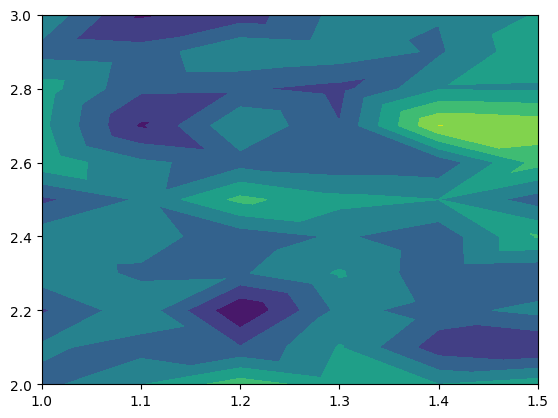

In [5]:
print(stxm_stp_time)
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-2.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])

## STXM scan using software tigger fast(non-stop)

In [6]:
stxm_fast= TaskRequest(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.1,
                "step_motor": "sample_stage.x",
                "step_start": 1.0,
                "step_end": 1.5,
                "scan_motor": "sample_stage.y",
                "scan_start":  2.0,
                "scan_end": 3.0,
                "plan_time": stxm_stp_time/2,
            },
            instrument_session= "p99",
        )
start= time()
bc.run_task(stxm_fast)
stxm_fast_time = time()-start


28.54444146156311


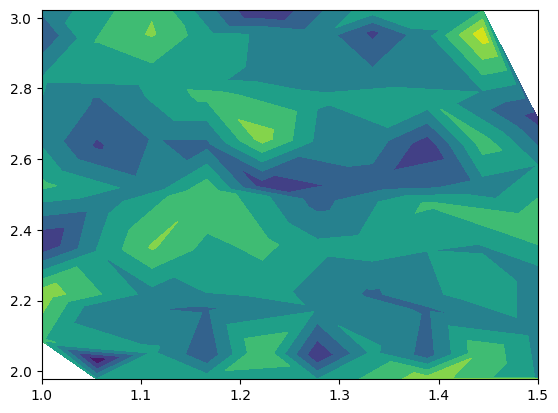

In [7]:
print(stxm_fast_time)
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-3.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])

## ptychography

In [8]:
stxm_fast= TaskRequest(
            name="stxm_fast",
            params={
                "dets": ["andor2_det"],
                "count_time": 0.1,
                "step_motor": "sample_stage.x",
                "step_start": 1.0,
                "step_end": 1.5,
                "scan_motor": "sample_stage.y",
                "scan_start":  2.0,
                "scan_end": 3.0,
                "plan_time": stxm_stp_time/2,
            },
            instrument_session= "p99",
        )
start= time()
bc.run_task(stxm_fast)
stxm_fast_time = time()-start


24.19021987915039


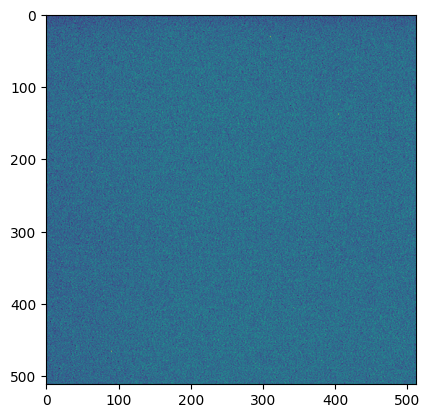

In [9]:
print(stxm_fast_time)
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-5.nxs",  "r")
data =nexusData["entry/instrument"]
plt.imshow(data["andor2_det/andor2_det"][15])